<a href="https://colab.research.google.com/github/pakpak123/MachineLearning/blob/main/ml_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")

In [ ]:
data

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [ ]:
data.drop(['customerID'], axis=1, inplace=True)

In [ ]:
x = data['TotalCharges'].mean()

In [ ]:
data['TotalCharges'].fillna(x)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.50,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.30,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6983 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6983 non-null   object 
 1   SeniorCitizen     6983 non-null   int64  
 2   tenure            6983 non-null   int64  
 3   ServiceCount      6983 non-null   int64  
 4   Contract          6983 non-null   object 
 5   PaperlessBilling  6983 non-null   object 
 6   MonthlyCharges    6983 non-null   float64
 7   TotalCharges      6956 non-null   float64
 8   Churn             6983 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 545.5+ KB


In [ ]:
data.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,6983.000000,6983.000000,6983.000000,6983.000000,6956.000000
mean,0.162967,32.640699,5.448804,65.001489,2301.960092
std,0.369362,24.491253,1.961585,30.033025,2265.592110
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,4.000000,36.025000,417.687500
50%,0.000000,29.000000,6.000000,70.450000,1415.275000
75%,0.000000,56.000000,7.000000,89.950000,3828.362500
max,1.000000,72.000000,9.000000,118.750000,8684.800000


In [ ]:
data1 = pd.DataFrame()
data1['tenure'] = data['tenure']
data1['ServiceCount'] = data['ServiceCount']
data1['MonthlyCharges'] = data['MonthlyCharges']
data1['TotalCharges'] = data['TotalCharges']


In [ ]:
data1

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.50
2,2,4,53.85,108.15
3,45,4,42.30,1840.75
4,2,2,70.70,151.65
...,...,...,...,...
7038,24,8,84.80,1990.50
7039,72,7,103.20,7362.90
7040,11,2,29.60,346.45
7041,4,3,74.40,306.60


In [ ]:
dataCorr = data1.corr()
dataCorr

,tenure,ServiceCount,MonthlyCharges,TotalCharges
tenure,1.000000,0.513522,0.240886,0.824445
ServiceCount,0.513522,1.000000,0.047256,0.447143
MonthlyCharges,0.240886,0.047256,1.000000,0.649721
TotalCharges,0.824445,0.447143,0.649721,1.000000


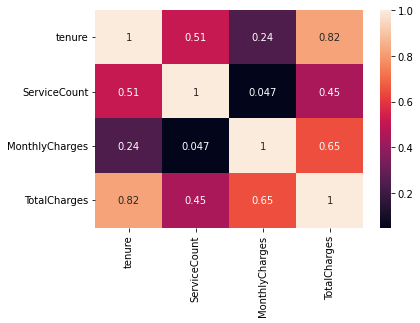

In [ ]:
sns.heatmap(dataCorr,annot=True)

In [ ]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower


,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,0.000000,0.000000,0.000000,0.0
1,0.513522,0.000000,0.000000,0.0
2,0.240886,0.047256,0.000000,0.0
3,0.824445,0.447143,0.649721,0.0


In [ ]:
to_drop = [column for column in lower if any(lower[column] > 0.6)]

In [ ]:
data1.drop(to_drop, inplace=True, axis=1)
data1

,ServiceCount,TotalCharges
0,2,29.85
1,4,1889.50
2,4,108.15
3,4,1840.75
4,2,151.65
...,...,...
7038,8,1990.50
7039,7,7362.90
7040,2,346.45
7041,3,306.60


In [ ]:
data1.describe()

,ServiceCount,TotalCharges
count,6983.000000,6956.000000
mean,5.448804,2301.960092
std,1.961585,2265.592110
min,1.000000,18.800000
25%,4.000000,417.687500
50%,6.000000,1415.275000
75%,7.000000,3828.362500
max,9.000000,8684.800000


In [ ]:
data2 = pd.DataFrame()
data2['Churn'] = data['Churn']
data2

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
lebel = preprocessing.LabelEncoder()
lebel.fit(data2['Churn'])
data2['chrun_transform'] = lebel.transform(data2['Churn'])


lebel.fit(data['gender'])
data2['gender'] = lebel.transform(data['gender'])

lebel.fit(data['Contract'])
data2['Contract'] = lebel.transform(data['Contract'])

lebel.fit(data['PaperlessBilling'])
data2['PaperlessBilling'] = lebel.transform(data['PaperlessBilling'])

In [ ]:
Output = pd.DataFrame()
Variables = pd.DataFrame()

Output['Chrun'] =data2['chrun_transform']

Variables['gender'] = data2['gender']
Variables['Contract'] = data2['Contract']
Variables['PaperlessBilling'] = data2['PaperlessBilling']

In [ ]:
Chi_table = chi2(Variables,Output)

In [ ]:
Chi_table

(array([1.69032850e-01, 1.09997055e+03, 1.01928373e+02]),
 array([6.80972779e-001, 3.35186442e-241, 5.75660495e-024]))

In [ ]:
data3 = pd.DataFrame()
data3['ServiceCount']  = data['ServiceCount'] 
data3['TotalCharges']  = data['TotalCharges'] 
data3['gender']  = Variables['gender'] 
data3['PaperlessBilling']  = Variables['PaperlessBilling'] 
data3['Contract'] = Variables['Contract'] 
data3['Chrun']  = Output['Chrun'] 

In [ ]:
data3

,ServiceCount,TotalCharges,gender,PaperlessBilling,Contract,Chrun
0,2,29.85,0,1,0,0
1,4,1889.50,1,0,1,0
2,4,108.15,1,1,0,1
3,4,1840.75,1,0,1,0
4,2,151.65,0,1,0,1
...,...,...,...,...,...,...
7038,8,1990.50,1,1,1,0
7039,7,7362.90,0,1,1,0
7040,2,346.45,0,1,0,0
7041,3,306.60,1,1,0,1


In [ ]:
p_value = Chi_table[1]
p_value

array([6.80972779e-001, 3.35186442e-241, 5.75660495e-024])

In [ ]:
Variables.columns

Index(['gender', 'Contract', 'PaperlessBilling'], dtype='object')

In [ ]:
lower = pd.DataFrame(np.tril(p_value, -1),columns = Variables.columns)
lower

,gender,Contract,PaperlessBilling
0,0.000000,0.000000e+00,0.0
1,0.680973,0.000000e+00,0.0
2,0.680973,3.351864e-241,0.0


In [ ]:
to_drop = [column for column in lower if any(lower[column] > 0.05)] 
to_drop
data3.drop(to_drop, inplace=True, axis=1)
data3

,ServiceCount,TotalCharges,PaperlessBilling,Contract,Chrun
0,2,29.85,1,0,0
1,4,1889.50,0,1,0
2,4,108.15,1,0,1
3,4,1840.75,0,1,0
4,2,151.65,1,0,1
...,...,...,...,...,...
7038,8,1990.50,1,1,0
7039,7,7362.90,1,1,0
7040,2,346.45,1,0,0
7041,3,306.60,1,0,1
